In [21]:
%matplotlib inline
from astropy.table import Table, Column
from matplotlib import pyplot as plt
from skimage import io
import numpy as np
from IPython import display

In [22]:
results = Table.read('./catalogs/results_table_full_0.5_2.0.fits')
results_df = results.to_pandas()
results_df = results_df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

In [23]:
dup_mask = results_df[['NAME', 'RA_detc']].duplicated('NAME', keep=False)

In [24]:
dup_cat = results_df[dup_mask]

In [25]:
dup_cat

,NAME,RA_detc,DEC_detc,REDSHIFT,INDEX,PSZ_dist,EXPTIME,SN,redCHI2,DOF,...,CNT_RATE_MODEL,ECF,LUM,FLUX_CORR,FLUX_CORR_POSERR,FLUX_CORR_NEGERR,LUM_CORR,LUM_CORR_POSERR,LUM_CORR_NEGERR,CORR
1,PSZ1 G031.41+28.75,256.352423,11.435046,0.230000,22,5.466415,216357.265625,3.8784,0.9300,1.0,...,0.000119,1.990600e-11,3.394900e+41,4.282980e-15,1.104316e-15,1.104316e-15,6.131003e+41,1.580808e+41,1.580808e+41,0.805945
2,PSZ1 G031.41+28.75,256.315811,11.451588,0.230000,26,3.141828,214575.031250,4.6413,0.6680,3.0,...,0.000179,2.041800e-11,5.230700e+41,5.323069e-15,1.146904e-15,1.146904e-15,7.619764e+41,1.641748e+41,1.641748e+41,0.456739
3,PSZ1 G031.41+28.75,256.284255,11.378438,0.230000,33,5.074731,197958.078125,5.1874,0.5030,3.0,...,0.000207,2.257400e-11,6.697200e+41,6.398791e-15,1.233536e-15,1.233536e-15,9.159770e+41,1.765788e+41,1.765788e+41,0.367701
6,PSZ1 G083.35+76.41,203.700147,37.182100,-1.000000,1,0.925372,46343.074219,-1.0000,6.3410,297.0,...,0.154388,2.372500e-11,8.871100e+43,3.711065e-12,3.711065e-12,3.711065e-12,8.987995e+43,8.987995e+43,8.987995e+43,0.013177
7,PSZ1 G083.35+76.41,203.620426,37.209131,-1.000000,2,3.391040,52051.796875,-1.0000,1.5500,7.0,...,0.000113,2.108900e-11,5.787100e+40,4.652337e-15,4.652337e-15,4.652337e-15,1.126791e+41,1.126791e+41,1.126791e+41,0.947073
28,PSZ1 G292.00-43.64,38.261892,-71.275759,-1.000000,7,1.938189,327520.093750,-1.0000,-1.0000,-1.0,...,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
29,PSZ1 G292.00-43.64,38.184324,-71.219107,-1.000000,9,3.472973,327940.125000,-1.0000,-1.0000,-1.0,...,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
30,PSZ1 G292.00-43.64,38.162681,-71.298036,-1.000000,11,1.291543,329085.218750,-1.0000,-1.0000,-1.0,...,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
31,PSZ1 G292.00-43.64,38.157531,-71.263793,-1.000000,12,0.766725,322966.812500,-1.0000,-1.0000,-1.0,...,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000
32,PSZ1 G292.00-43.64,38.120430,-71.310465,-1.000000,14,2.183518,325856.375000,-1.0000,-1.0000,-1.0,...,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000


In [26]:
dup_cat_tab = Table.from_pandas(dup_cat)
dup_cat_tab.filled(-1.0).write('./catalogs/results_table_dups_0.5_2.0.fits', overwrite=True)

## Column for Duplicates

Add a column to the results table indicating whether or not the source is a duplicate

Then we are gonna mark all the current duplicates as true and then loop through them. 

In [27]:
results.add_column(Column(data=False, name='DUPLICATE'))

In [28]:
results['DUPLICATE'][dup_cat.index.values] = True

## Now we are gonna visually inspect the duplicate fields

This is gonna let us identify which is the "primary" source

In [29]:
# use the pandas iterrows because the astropy one sucks
results_df = results.to_pandas()

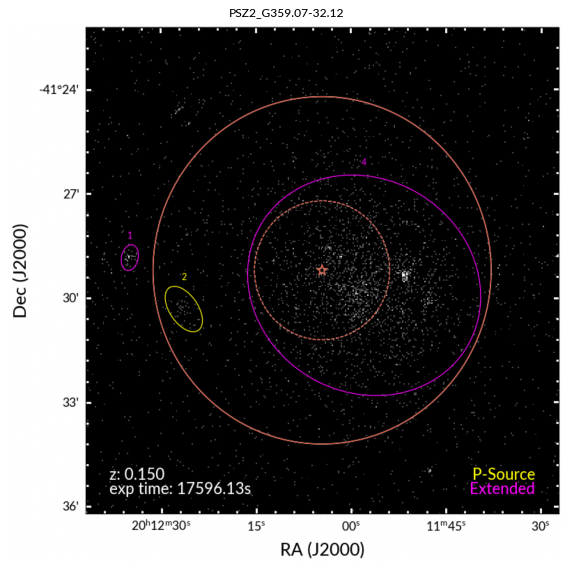

Is 1 the main source? [n]y.
Is 4 the main source? [n]y.y
updated


In [30]:
# make a catalog mask

fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot()

plt.ion()

name_old= ''
for index, row in results_df.iterrows():
    if not row.DUPLICATE:
        continue

    try:
        name = row.NAME.decode().replace(' ', '_')

        if name == name_old:
            pass
        else:
            display.clear_output(wait=True)
            jpgfile = f'../data/{name}/{name}_XRT_vtp_zoom.png'
            jpg_array = io.imread(jpgfile)
            name_old = name
            
            ax.imshow(jpg_array, origin='upper', interpolation='bicubic')
            ax.set_title(f'{name}')

            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.yaxis.set_ticks([])
            ax.xaxis.set_ticks([])

            plt.show()
            display.display(fig)
            
    except NameError:
        display.clear_output(wait=True)
        jpgfile = f'../data/{name}/{name}_XRT_vtp_zoom.png'
        jpg_array = io.imread(jpgfile)
        name_old = name
        
        ax.imshow(jpg_array, origin='upper', interpolation='bicubic')
        ax.set_title(f'{name}')

        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.yaxis.set_ticks([])
        ax.xaxis.set_ticks([])

        plt.show()
        display.display(fig)

    x = input(f"Is {row.INDEX} the main source? [n]y.")
    
    if x == 'y':
        print('updated')
        results_df.loc[index, 'DUPLICATE'] = False

# Save the results!

So we don't have to look at all of them again. 

Uncomment the next cell if you are gonna redo the inspections!

In [32]:
results_df = results_df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)

In [33]:
results_df.loc[results_df.NAME.str.contains('039.34')]

,NAME,RA_detc,DEC_detc,REDSHIFT,INDEX,PSZ_dist,EXPTIME,SN,redCHI2,DOF,...,ECF,LUM,FLUX_CORR,FLUX_CORR_POSERR,FLUX_CORR_NEGERR,LUM_CORR,LUM_CORR_POSERR,LUM_CORR_NEGERR,CORR,DUPLICATE
67,PSZ2 G039.34+73.28,211.732469,27.674009,0.566447,16,3.950811,97289.156250,7.5604,1.4160,8.0,...,2.000600e-11,1.028600e+43,1.057919e-14,1.399287e-15,1.399287e-15,1.138604e+43,1.506008e+42,1.506008e+42,0.106945,True
68,PSZ2 G039.34+73.28,211.702755,27.704370,0.566447,19,1.615633,81410.085938,-1.0000,8.2880,4.0,...,2.375900e-11,3.244600e+42,3.729369e-15,3.729369e-15,3.729369e-15,4.013903e+42,4.013903e+42,4.013903e+42,0.237103,True
69,PSZ2 G039.34+73.28,211.657195,27.732011,0.566447,21,1.917333,82403.281250,34.4486,1.0305,149.0,...,2.347800e-11,3.078400e+44,2.998766e-13,8.705055e-15,8.705055e-15,3.227537e+44,9.369150e+42,9.369150e+42,0.048446,False


In [34]:
results = Table.from_pandas(results_df)
results.filled(-1.0).write('./catalogs/results_table_inspected_0.5_2.0.fits', overwrite=True)